# Understanding the eGFR dataset

### Importing libraries

In [6]:
# Numpy
import numpy as np
from numpy import concatenate, array
from numpy.random import randn
# Decimal precision value to display in the matrix
np.set_printoptions(precision=5, suppress=True)

# Scipy
import scipy
import scipy.stats as stats

# Matplotlib
import matplotlib.pyplot as pyplot
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
#mpl.rc('figure', figsize=(10, 8))

# DBscan from sklearn
from sklearn import cluster, datasets
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

# Misc
import time
import datetime as dt
print 'All libraries loaded.'

All libraries loaded.


## Plot function definitions

In [7]:
def plot_pdf(data, title):
    data.sort()
    pdf = stats.norm.pdf(data, np.mean(data), np.std(data))
    pyplot.plot(data, pdf, '-o', linewidth=3)
    pyplot.grid()
    pyplot.title(title)
    pyplot.show()

# Pandas experiments

In [8]:
# Pandas experiments
import pandas as pd
from pandas import Series, DataFrame, Panel

datestr = ["2004-10-06 10:53:00", "2005-10-06 10:53:00", "2005-12-16 10:53:00", "2006-08-06 10:53:00"]
y = [10, 40, 30, 20]

datestr = [d[:10] for d in datestr]
dates = pd.date_range('2004-10-06', '2006-10-06')
x = Series(range(731), index=dates)

# Make dataframe
original_dataframe = pd.read_csv('dataset/small_cdr_gfr_derived.csv', usecols=['idperson','resultdata','gender','birthyear','age','gfr_standardized'], parse_dates='resultdata', index_col='resultdata')
# !cat 'dataset/small_cdr_gfr_derived.csv'

# Normalize the dates (remove the time part)
original_dataframe.index = original_dataframe.index.map(pd.datetools.normalize_date)
original_dataframe

,idperson,gender,birthyear,age,gfr_standardized
2006-08-10,8545348,F,1941,73,54.348481
2009-05-04,8545348,F,1941,73,46.253234
2011-01-24,8545348,F,1941,73,47.199227
2011-08-25,8545348,F,1941,73,41.247527
2011-08-25,8545348,F,1941,73,41.247527
2012-01-26,8545348,F,1941,73,54.348481
2006-09-11,8545350,F,1932,82,36.000289
2007-03-12,8545350,F,1932,82,39.214539
2008-03-12,8545350,F,1932,82,43.009321
2009-03-03,8545350,F,1932,82,43.426672


## Make dataframe filled with NaN values

### The indexes are the timestamps, beginning from the very first possible date for all users going till the last. We will fill replace the NaN values with the user's actual eGFR values

In [9]:
# Make dataframe using range
firstdate = min(original_dataframe.index)
lastdate = max(original_dataframe.index)
diff_between_dates = lastdate - firstdate
daterange = pd.date_range(min(original_dataframe.index), max(original_dataframe.index))
nan_series = Series(np.NaN, index=daterange)
# print newframe_series

# Use the time-series generated above to make the NaN dataframe
nan_patient_dict = {}
for p in np.unique(original_dataframe.idperson):
    nan_patient_dict[p] = nan_series

# Make new frame
egfr_frame = DataFrame(nan_patient_dict)
print egfr_frame

            8545348  8545350  8545384  8555094  8555096  8555099  8567462
2004-05-19      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-20      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-21      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-22      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-23      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-24      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-25      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-26      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-27      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-28      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-29      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-30      NaN      NaN      NaN      NaN      NaN      NaN      NaN
2004-05-31      NaN      NaN      NaN 

In [10]:
# Fill dataframe with the patients' eGFR data

for patient in np.unique(original_dataframe.idperson):
    # Make dataframe for patient's data
    userframe = original_dataframe[original_dataframe.idperson==patient].gfr_standardized
    # Fill in the users's data into the egfr_frame
    egfr_frame[patient][userframe.index] = userframe.values
    
egfr_frame

,8545348,8545350,8545384,8555094,8555096,8555099,8567462
2004-05-19,NaN,NaN,NaN,NaN,NaN,NaN,55.472091
2004-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


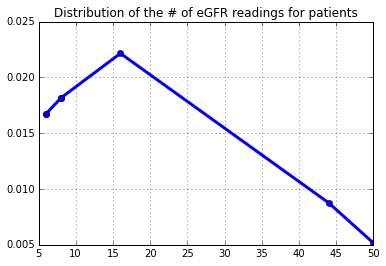

# of patients: 7
On an average a patient has 19.7142857143 eGFR counts


In [11]:
def analyze_patient_records(person_ids, egfr_values, k = 4):
    
    # Try with a smaller subset
#     person_ids = np.array(person_ids[0:20])
#     egfr_values = np.array(egfr_values[0:20])
    
    unique_patients, unique_index, egfr_counts = np.unique(person_ids, return_counts=True, return_index=True)
    
    # Plot distribution of the # of eGFR readings for patients
    plot_pdf(egfr_counts, 'Distribution of the # of eGFR readings for patients')
    
    top_k_egfr = np.argpartition(egfr_counts, -k)[-k:]
    top_k_patients = unique_patients[top_k_egfr]
    
    print '# of patients:', unique_patients.shape[0]
    print 'On an average a patient has', np.average(egfr_counts), 'eGFR counts'
    
    return top_k_egfr, top_k_patients


def get_topk_information(egfr_frame, top_k_egfr, top_k_patients):
    
    # Top k patients = top_k_patients
    # eGFR values of the top k patients = topk_egfr_values
    # Timestamp values of the top k patients = topk_timestamps
    
    topk_egfr_values = []
    topk_timestamps = []
    for patient in top_k_patients:
#         this_patients_egfr_values = all_egfr_values[np.where(person_ids == this_patients_id)]
#         this_patients_timestamps_values = all_timestamps[np.where(person_ids == this_patients_id)]
        
        timestamps = egfr_frame[patient].dropna().index.values
        egfr_for_this_patient = egfr_frame[patient].dropna().values
        
        topk_egfr_values.append(egfr_for_this_patient)
        topk_timestamps.append(timestamps)

    return topk_timestamps, topk_egfr_values


top_k_egfr, top_k_patients = analyze_patient_records(original_dataframe.idperson.values, original_dataframe.gfr_standardized.values)

topk_timestamps, topk_egfr_values = get_topk_information(egfr_frame, top_k_egfr, top_k_patients)
# topk_timestamps, topk_egfr_values = get_topk_information(top_k_egfr, top_k_patients, timestamp, egfr)

## Understanding the time gaps in eGFR readings

### We look at the gaps (in days) of the eGFR readings for the top 4 patients

difference_in_dates 23.0
difference_in_dates 161.0
difference_in_dates 410.0
On an average patient 8545384 has gaps of 198.00 days
Mode: 23 days (with 1 counts)
Variance: 25646.0


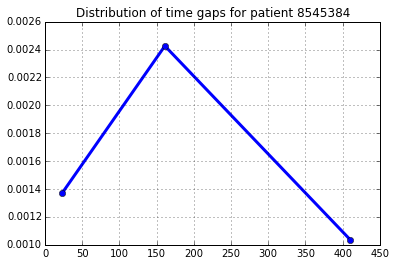

difference_in_dates 81.0
difference_in_dates 78.0
difference_in_dates 14.0
difference_in_dates 7.0
difference_in_dates 34.0
difference_in_dates 7.0
difference_in_dates 16.0
difference_in_dates 32.0
difference_in_dates 64.0
difference_in_dates 6.0
difference_in_dates 22.0
difference_in_dates 13.0
difference_in_dates 21.0
difference_in_dates 36.0
difference_in_dates 6.0
difference_in_dates 29.0
difference_in_dates 28.0
difference_in_dates 7.0
difference_in_dates 13.0
difference_in_dates 15.0
difference_in_dates 63.0
difference_in_dates 115.0
difference_in_dates 70.0
difference_in_dates 42.0
difference_in_dates 4.0
difference_in_dates 31.0
difference_in_dates 110.0
difference_in_dates 26.0
difference_in_dates 50.0
difference_in_dates 29.0
difference_in_dates 62.0
difference_in_dates 87.0
difference_in_dates 257.0
difference_in_dates 168.0
difference_in_dates 22.0
difference_in_dates 6.0
difference_in_dates 147.0
difference_in_dates 61.0
difference_in_dates 16.0
difference_in_dates 14.0
di

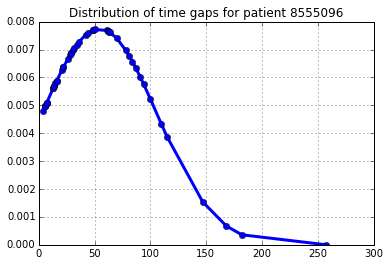

difference_in_dates 195.0
difference_in_dates 386.0
difference_in_dates 151.0
difference_in_dates 7.0
difference_in_dates 140.0
difference_in_dates 231.0
difference_in_dates 360.0
difference_in_dates 192.0
difference_in_dates 179.0
difference_in_dates 31.0
difference_in_dates 157.0
difference_in_dates 182.0
difference_in_dates 75.0
difference_in_dates 139.0
difference_in_dates 182.0
On an average patient 8555099 has gaps of 173.80 days
Mode: 182 days (with 2 counts)
Variance: 9669.62666667


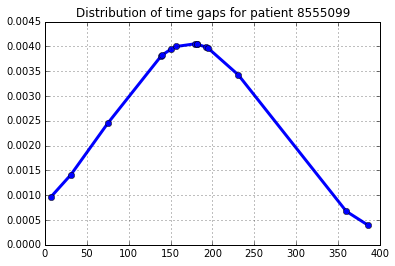

difference_in_dates 48.0
difference_in_dates 76.0
difference_in_dates 16.0
difference_in_dates 7.0
difference_in_dates 5.0
difference_in_dates 14.0
difference_in_dates 4.0
difference_in_dates 104.0
difference_in_dates 159.0
difference_in_dates 28.0
difference_in_dates 63.0
difference_in_dates 65.0
difference_in_dates 89.0
difference_in_dates 183.0
difference_in_dates 69.0
difference_in_dates 98.0
difference_in_dates 199.0
difference_in_dates 81.0
difference_in_dates 42.0
difference_in_dates 147.0
difference_in_dates 127.0
difference_in_dates 13.0
difference_in_dates 80.0
difference_in_dates 80.0
difference_in_dates 50.0
difference_in_dates 15.0
difference_in_dates 48.0
difference_in_dates 20.0
difference_in_dates 72.0
difference_in_dates 98.0
difference_in_dates 21.0
difference_in_dates 56.0
difference_in_dates 34.0
difference_in_dates 91.0
difference_in_dates 70.0
difference_in_dates 42.0
difference_in_dates 34.0
difference_in_dates 57.0
difference_in_dates 169.0
difference_in_dates 4

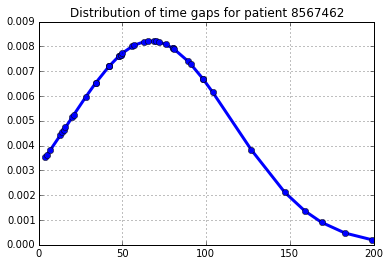

In [12]:
def get_time_gaps_for_single_patient(dates):
    time_gaps = []
    for i in range(0, len(dates)-1):
        difference_in_dates = dates[i+1] - dates[i]
        diff = (difference_in_dates.astype('timedelta64[D]') / np.timedelta64(1, 'D'))
        print 'difference_in_dates', diff
        time_gaps.append(diff)
    return time_gaps
    
def analyze_time_gaps_for_patients(top_k_patients, topk_timestamps):
    for i in range(len(top_k_patients)):
        time_gaps = get_time_gaps_for_single_patient(topk_timestamps[i])
        time_gaps = np.array(time_gaps)

        print 'On an average patient', top_k_patients[i], 'has gaps of', "{0:.2f}".format(np.average(time_gaps)), 'days'
        mode=scipy.stats.mode(time_gaps)
        print 'Mode:', int(mode[0][0]), 'days (with', int(mode[1][0]), 'counts)'
        print 'Variance:', np.var(time_gaps)
        plot_pdf(time_gaps, 'Distribution of time gaps for patient ' + str(top_k_patients[i]))
        
analyze_time_gaps_for_patients(top_k_patients, topk_timestamps)

## Plot eGFR trajectories

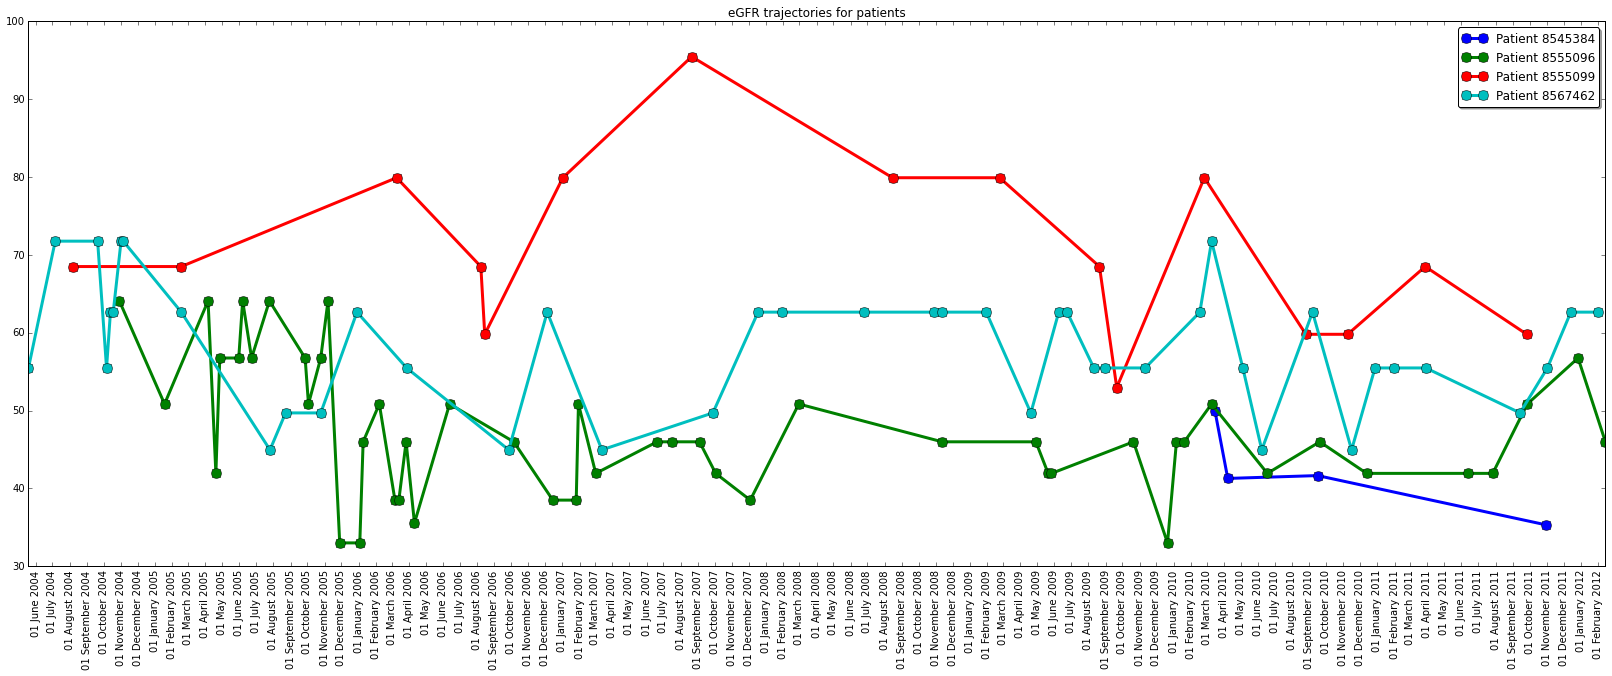

In [13]:
def plot_trajectories(egfr_frame, title='eGFR trajectories for patients'):
    
    figure = pyplot.figure()
    figure.set_size_inches(22.5, 9.5)

    # Get list of patients (columns)
    
    topk_patients = list(egfr_frame.columns.values)
    
    for i, patient in enumerate(top_k_patients):
        
#         pyplot.subplot(4,1,i)
        
        timestamps = egfr_frame[patient].dropna().index.values
        egfr_for_this_patient = egfr_frame[patient].dropna().values
        
        pyplot.plot(timestamps, egfr_for_this_patient, '-o', linewidth=3, markersize=10, label='Patient '+str(patient))
        
        # Set date-format for the x-axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %B %Y'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
        # plt.gcf().autofmt_xdate()
        plt.xticks(rotation=90)
        
        plt.legend(loc='best', fancybox=True, shadow=True)
        pyplot.grid()
        pyplot.title(title)
        pyplot.tight_layout()
    
    pyplot.show()
    

plot_trajectories(egfr_frame)

## Interpolate


### Apply linear interpolation

Interpolation method: linear


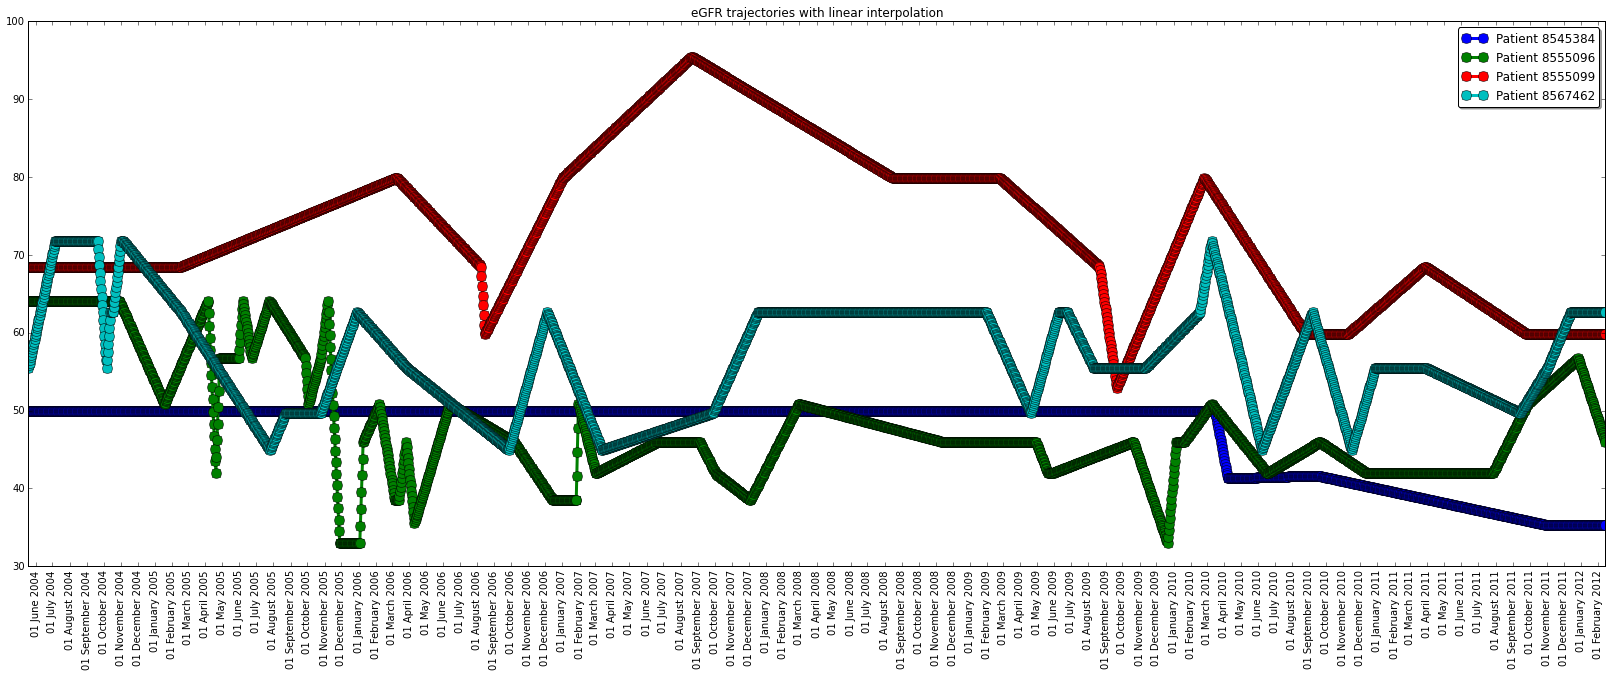

Interpolation method: quadratic


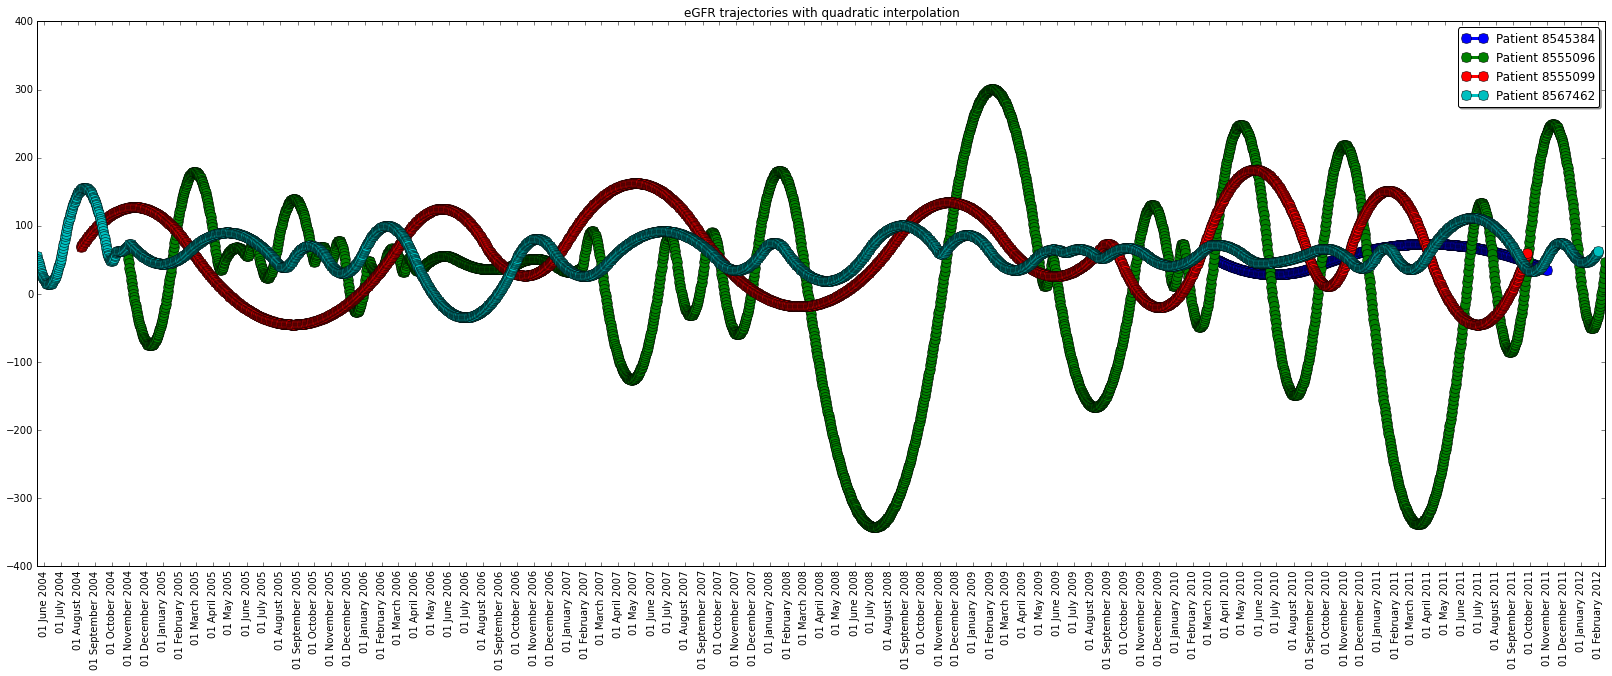

Interpolation method: cubic


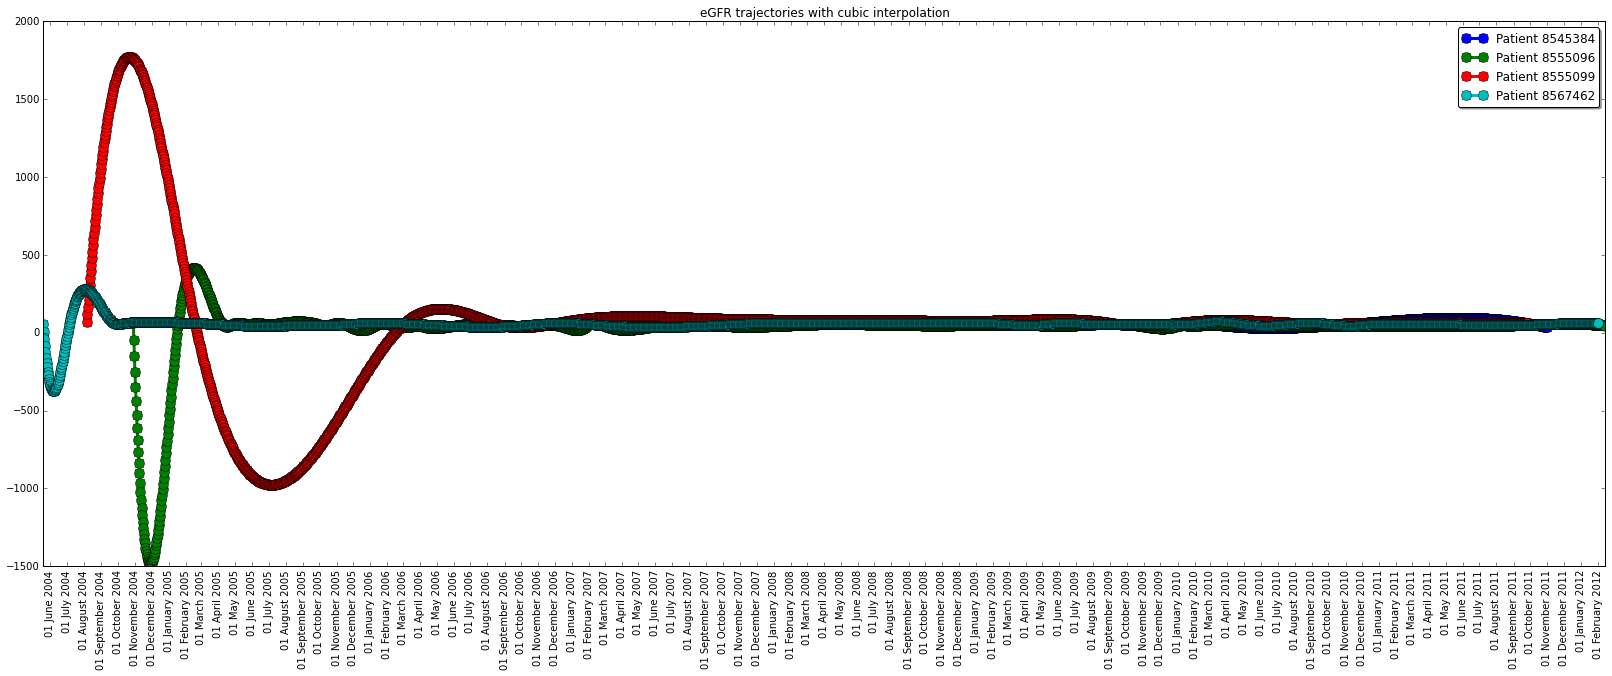

Interpolation method: barycentric


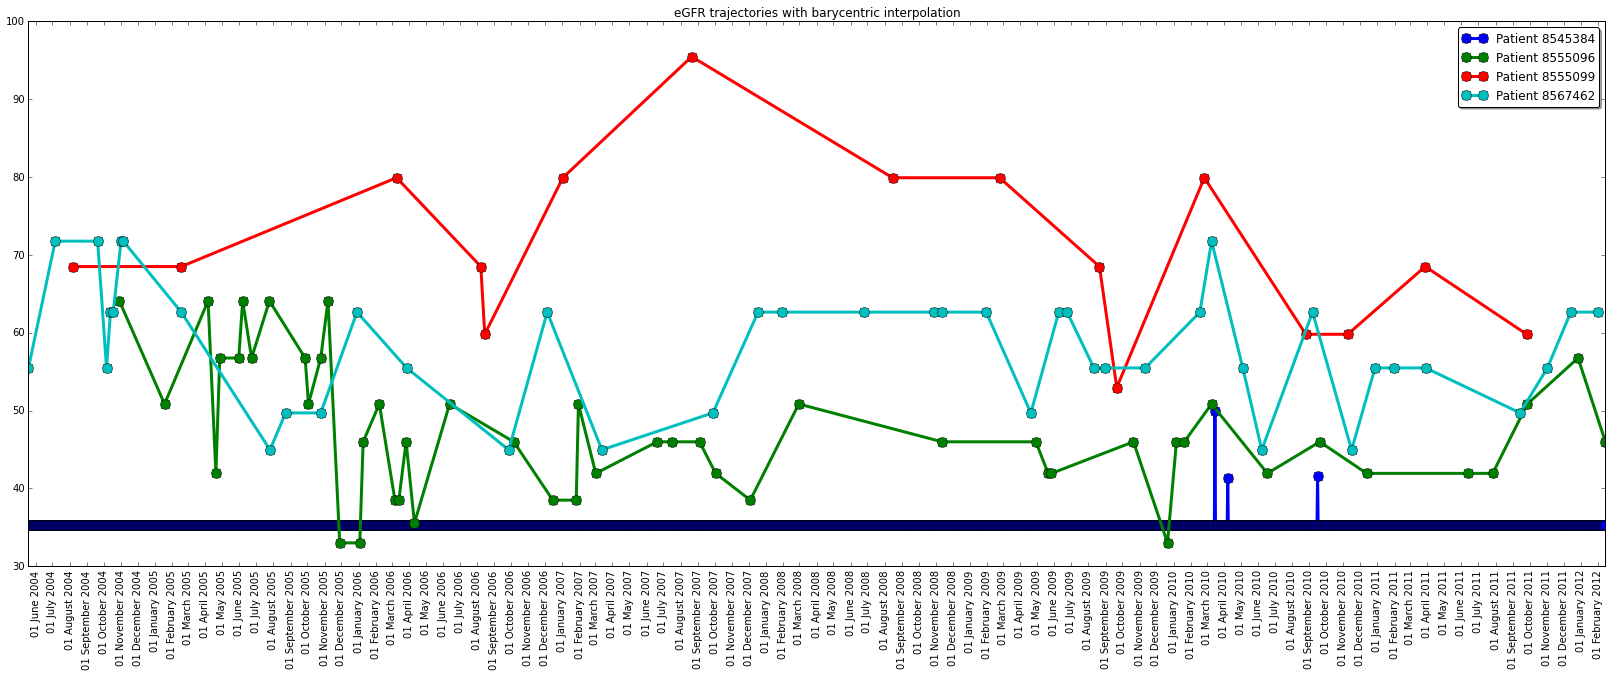

Interpolation method: pchip


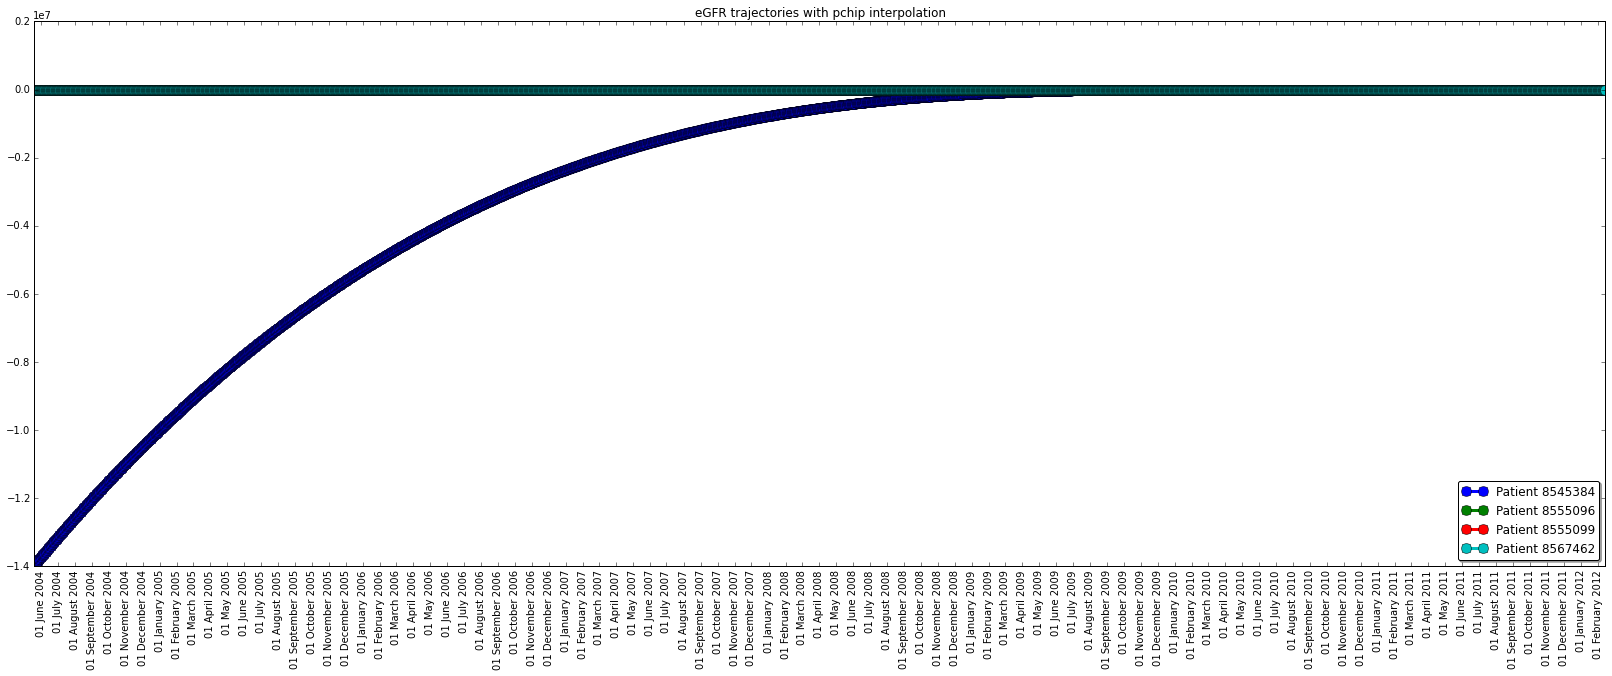

Interpolation method: nearest


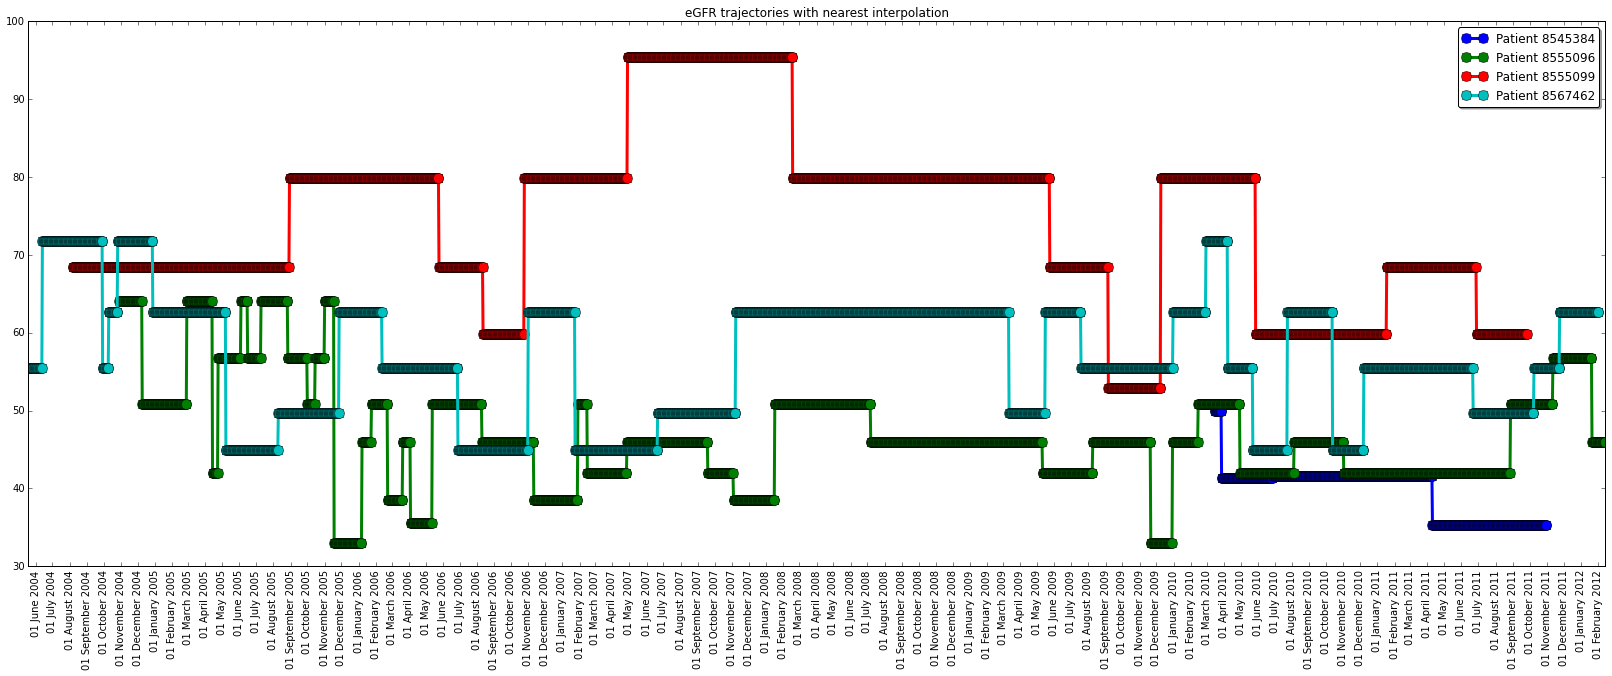

Interpolation method: krogh


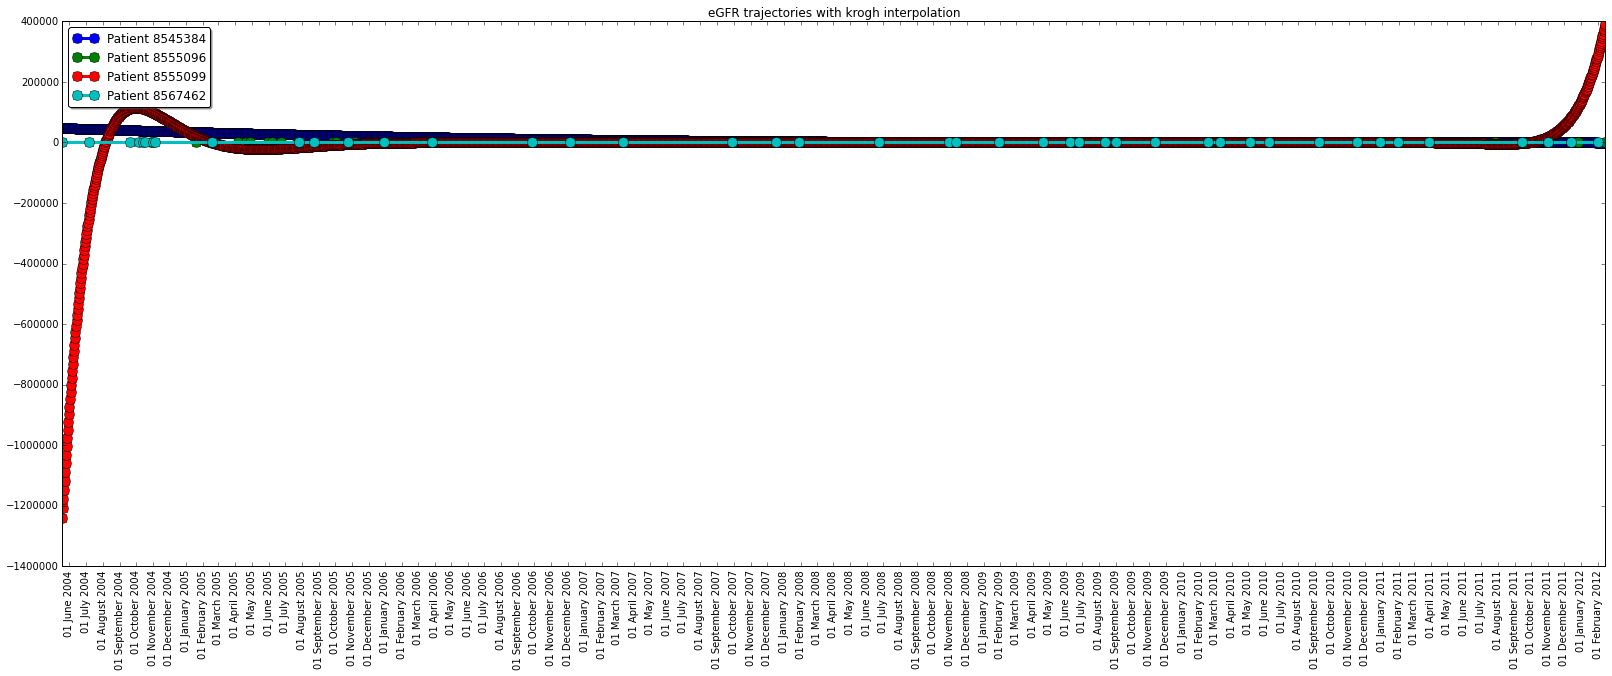

In [22]:
# List of interpolation methods
method_list = ['linear', 'quadratic', 'cubic', 'barycentric', 'pchip', 'nearest', 'krogh']

for current_method in method_list:
    print 'Interpolation method:', current_method
    plot_trajectories(egfr_frame.interpolate(method=current_method, limit_direction='both', limit=20000), title='eGFR trajectories with '+current_method+' interpolation')


Interpolation method: spline


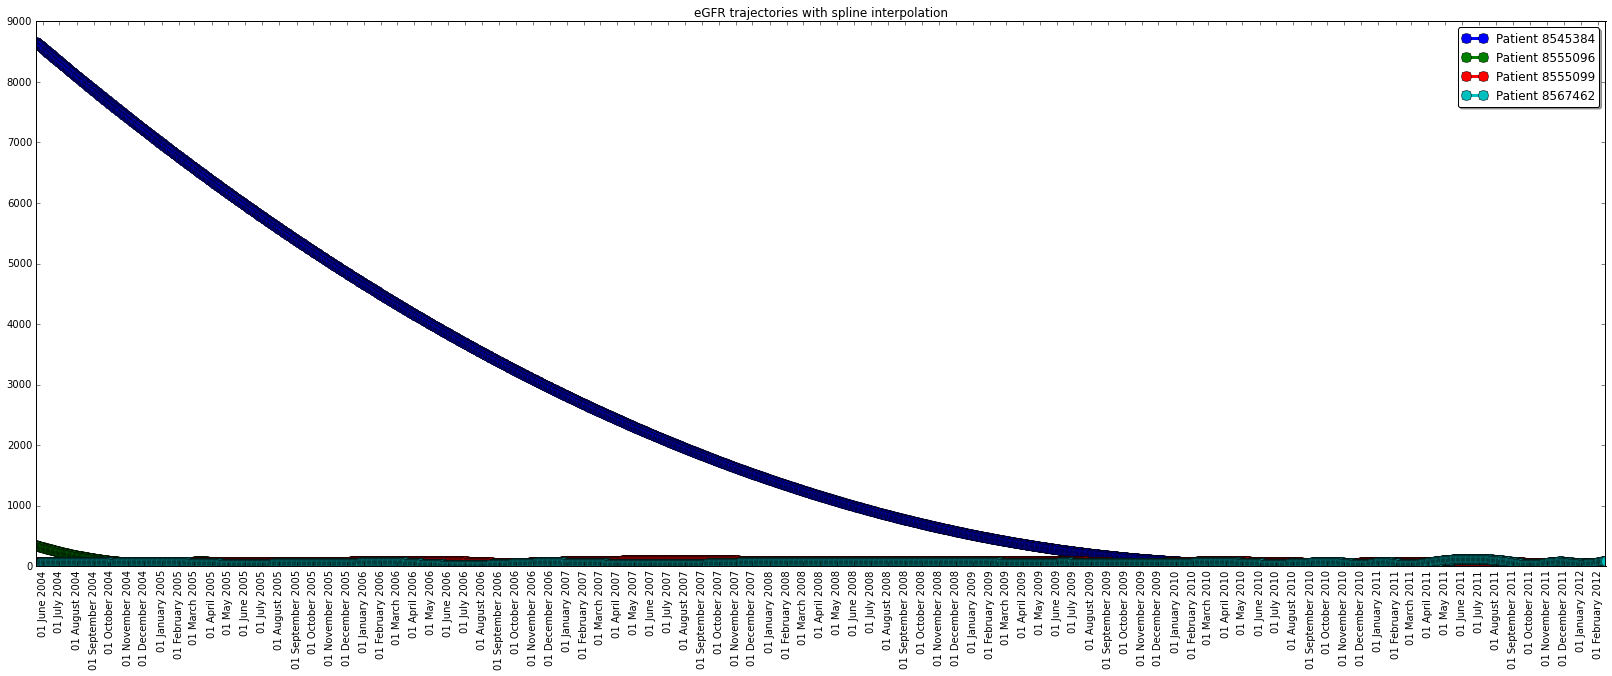

Interpolation method: polynomial


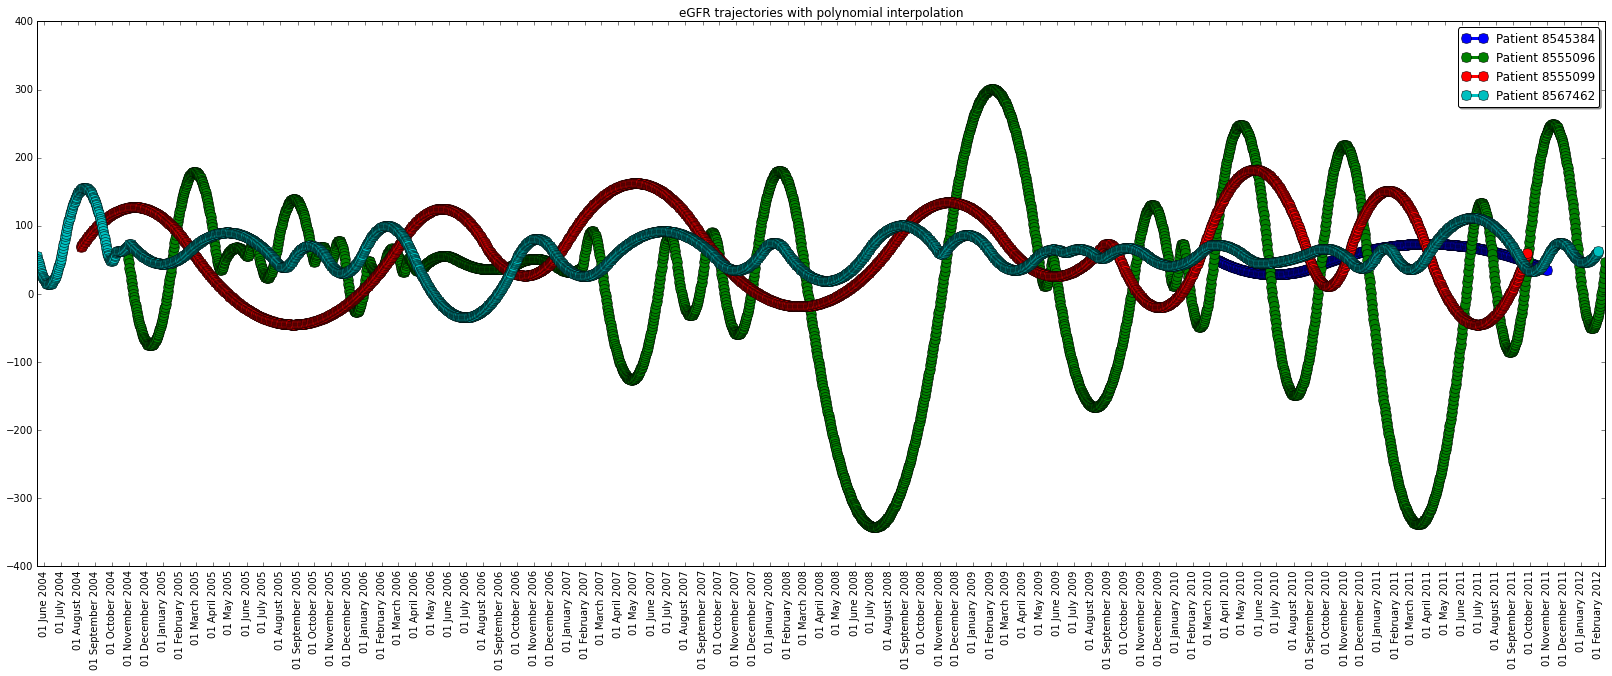

In [32]:
second_method_list = ['spline', 'polynomial']   # These methods require an order to be specified

for current_method in second_method_list:
    print 'Interpolation method:', current_method
    plot_trajectories(egfr_frame.interpolate(method=current_method, order=2, limit_direction='both', limit=10000), title='eGFR trajectories with '+current_method+' interpolation')

In [15]:
print scipy.__version__
print pd.__version__

0.16.0
0.17.1
